<a href="https://colab.research.google.com/github/ahan-b/Projects/blob/main/15_11_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are given a dataset of an NBFC with some historical data of loans being
granted and rejected. 

The Business Objective is to obtain a machine learning model which will take as inputs varibles such as an Applicant's Gender, Income, Co-Applicant's Income, Place of Residence, Loan Tenure, Education, Credit History, Loan Amount & Marital Status to predict whether the applicant must be granted a loan or not.

The Business is also clear that they do not want to compromise on the model's performance basis it's ability to reject the applications which are risky. 

Since, most rejected applicants are given the option to visit the nearest branch or talk to a tele-executive.

Therefore, the task on hand is to make sure that the model is not churning out False Positives.

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
loan_dataset.shape

(614, 13)

dropping the loan_id which is a serial number and useless in this case

In [5]:
#dropping the Loan_ID column
loan_dataset.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
# datatypes checking
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#separating the numeric variables
loan_dataset_numeric_variables=loan_dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
loan_dataset_numeric_variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [11]:
# label encoding of the target column
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

#separation of the target column

In [12]:
y=loan_dataset['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


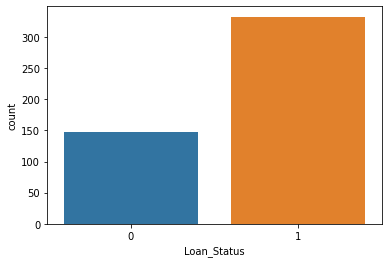

In [13]:
#checking the distribution of target features

sns.countplot(y)

# FINDINGS

#dataset is imbalanced 
# we have more instances of data with loans being granted and lesser with loans rejected 

# this is something which we shall try to deal with later on...

# the significance of this finding is that the model will train on more instances of loans being granted and less instances of loans being rejected and might thus later on predict false positives 

# EDA on Categorical Variables


# Exploring the Gender Variable


In [14]:
#Gender Value Counts
loan_dataset.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


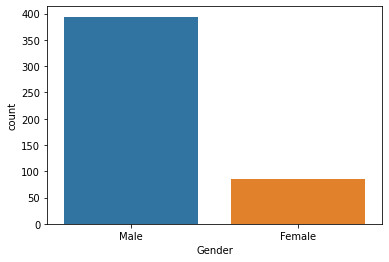

In [15]:
#Plotting the Gender Value Counts
sns.countplot(loan_dataset.Gender)

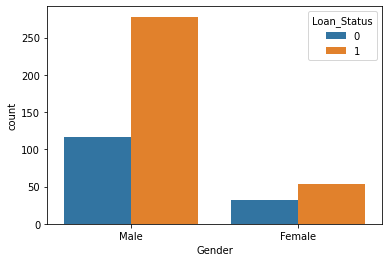

In [16]:
#Plot of Loan Status and Gender
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

The dataset contains more instances with data on males and because of the same most loans granted are obviously skewed towards males.

# Exploring the Married Variable


In [17]:
#Value Count of Married 
loan_dataset.Married.value_counts()

Yes    311
No     169
Name: Married, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


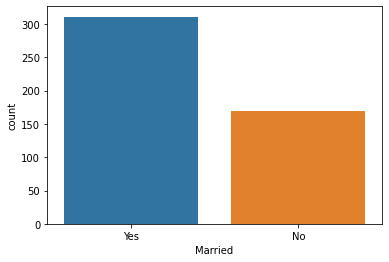

In [18]:
#Plot of value counts of Married
sns.countplot(loan_dataset.Married)

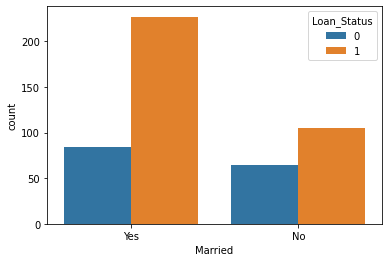

In [19]:
#Plot of Married and Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

Most of the loans are granted to married people

# Exploring the Dependents Variable

In [20]:
# Dependent column Value Counts
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [21]:
# replacing the value of 3+ to 4
loan_dataset.Dependents.replace(to_replace='3+', value=4,inplace=True)

In [22]:
# dependent Value Counts after Processing
loan_dataset.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


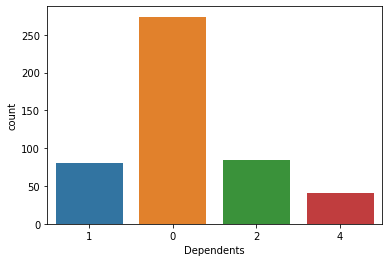

In [23]:
#Dependent Value Counts on a Bar Graph
sns.countplot(loan_dataset.Dependents)

Most of the applicants have zero dependents followed by 2,1 and 4 dependents

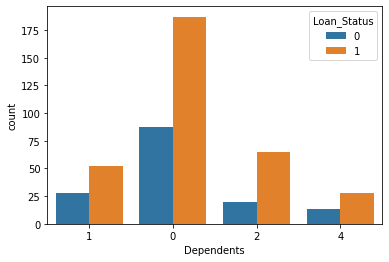

In [24]:
#Plot of Dependents and Loan Status
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

Most of the loans are granted to people with 0 dependents 

# Exploring the Education Variable

In [25]:
#Education Value Counts
loan_dataset.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


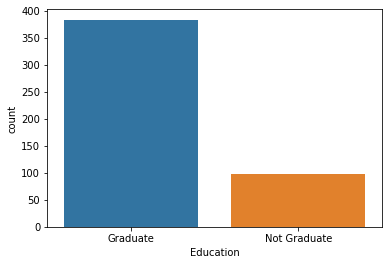

In [26]:
#Education Value Counts on a Bar Graph
sns.countplot(loan_dataset.Education)

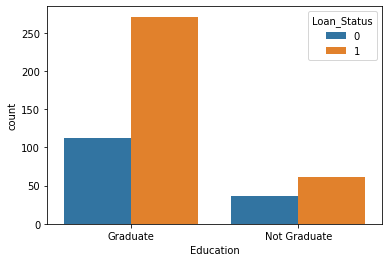

In [27]:
# Education & Loan Status Plot
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

Most of the loans are granted to Graduates

# Exploring the Self Employed Variable

In [28]:
# Self Employed Value Counts
loan_dataset.Self_Employed.value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


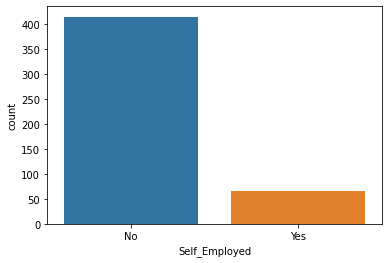

In [29]:
#plot of the Value Counts of Self Employed 
sns.countplot(loan_dataset.Self_Employed)

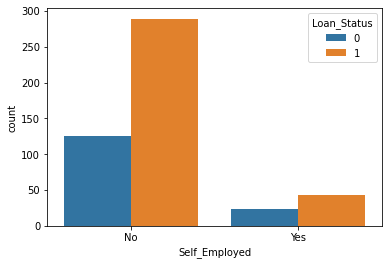

In [30]:
#plot of the Loan Status and Education
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

Most of the people are not Self Employed.

Most of the loans are granted to People who are gainfully employed in some service or the other

# Exploring the Property Area Variable

In [31]:
#Value counts of the Property Area Variable
loan_dataset.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


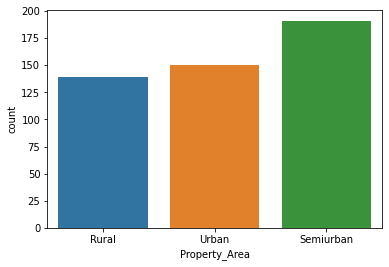

In [32]:
sns.countplot(loan_dataset.Property_Area)

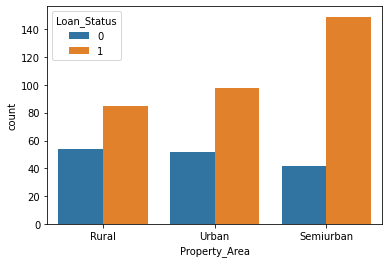

In [33]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_dataset)

In [34]:
loan_dataset.drop('Loan_Status',axis=1,inplace=True)

Most of the instances in the dataset are residing in the Semi Urban Areas followed by Urban and Rural Areas repsectively in order of number of occurences in the dataset.

Most of the loan applications from the Semi Urban Area are granted while most of the applications from the Rural Area are rejected.

# Feature Engineering the Categorical Variables

In [35]:
# converting the dependents variable to type int 
# since it is in some way an ordinal variable we donot need to apply label encoding

loan_dataset['Dependents']=loan_dataset['Dependents'].astype('int')

In [36]:
# for the rest of the categorical variables we shall use dummy variables and drop the first so as to reduce the dimensions

loan_dataset=pd.get_dummies(loan_dataset,drop_first=True)
loan_dataset.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1


# Exploring the Numeric Variables


In [42]:
loan_dataset_numeric_variables.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


#Outlier Treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


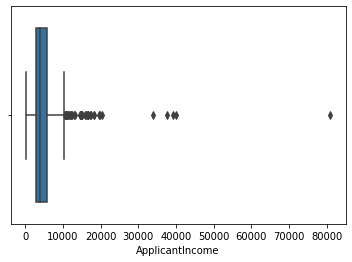

In [37]:
#boxplot before the outlier treatment
sns.boxplot(loan_dataset["ApplicantIncome"])

In [38]:
IQR = loan_dataset.ApplicantIncome.quantile(0.75) - loan_dataset.ApplicantIncome.quantile(0.25)

In [39]:
Upper_fence = loan_dataset.ApplicantIncome.quantile(0.75)
print(Upper_fence)
boundary=Upper_fence+(IQR*1.5)
boundary

5852.5


10283.125

In [40]:
loan_dataset['ApplicantIncome']=np.where(loan_dataset['ApplicantIncome']>10283.125,10283.125,loan_dataset['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


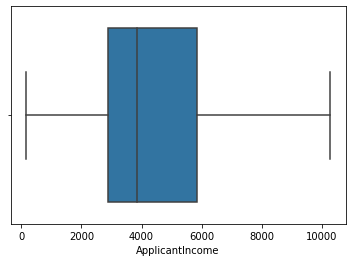

In [41]:
sns.boxplot(loan_dataset.ApplicantIncome)
#boxplot post outlier treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


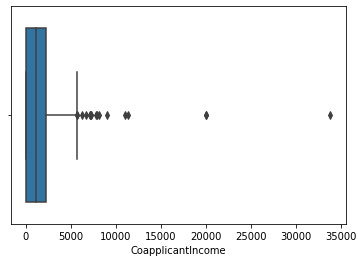

In [42]:
sns.boxplot(loan_dataset["CoapplicantIncome"])
#box plot before the outlier treatment

In [43]:
IQR_1 = loan_dataset.CoapplicantIncome.quantile(0.75) - loan_dataset.CoapplicantIncome.quantile(0.25)

In [44]:
Upper_fence_1 = loan_dataset.CoapplicantIncome.quantile(0.75)
print(Upper_fence_1)
boundary_1=Upper_fence_1+(IQR_1*1.5)
boundary_1

2253.25


5633.125

In [45]:
loan_dataset['CoapplicantIncome']=np.where(loan_dataset['CoapplicantIncome']>boundary_1,boundary_1,loan_dataset['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


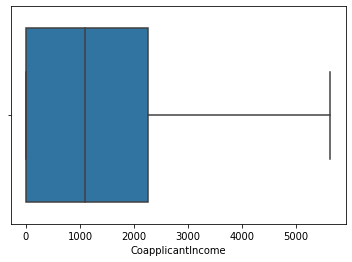

In [46]:
sns.boxplot(loan_dataset['CoapplicantIncome'])
#box plot post the outlier treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


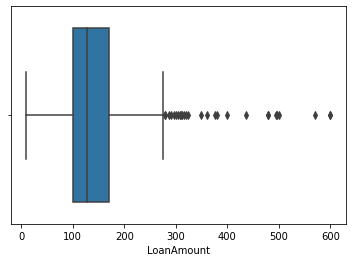

In [47]:
sns.boxplot(loan_dataset["LoanAmount"])
#bxplot before the outlier treatment

In [48]:
IQR_2 = loan_dataset.LoanAmount.quantile(0.75) - loan_dataset.LoanAmount.quantile(0.25)
print(IQR_2)

70.0


In [49]:
Upper_fence_2 = loan_dataset.LoanAmount.quantile(0.75)
print(Upper_fence_2)
boundary_2=Upper_fence_2+(IQR_2*1.5)
print(boundary_2)

170.0
275.0


In [50]:
loan_dataset['LoanAmount']=np.where(loan_dataset['LoanAmount']>boundary_2,boundary_2,loan_dataset['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


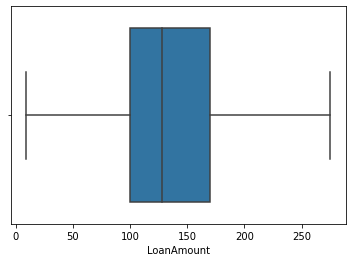

In [51]:
sns.boxplot(loan_dataset["LoanAmount"])
#boxplot post the outlier treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


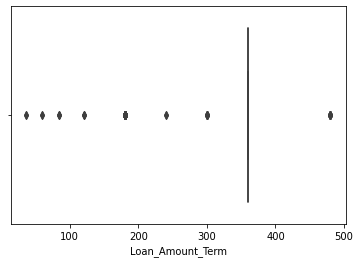

In [52]:
sns.boxplot(loan_dataset_numeric_variables["Loan_Amount_Term"])

#since the dataset was imbalanced towards the negative class and we donot want false positives therefore it is important to remove the imbalance

#SMOTE is the best method to do so since it will oversample the minority class without creating unenecessary repitition

In [53]:
#before oversampling
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
#loan_dataset,y
smote=SMOTE()

loan_dataset,y=smote.fit_resample(loan_dataset,y)

print(y.value_counts())

0    332
1    332
Name: Loan_Status, dtype: int64


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler=MinMaxScaler(feature_range=(0,1))

In [57]:
loan_dataset_1=loan_dataset
#will use standard scaler on this for log regression

In [60]:
loan_dataset_1.head(1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583.0,1508.0,128.0,360.0,1.0,1,1,0,0,0,0


In [61]:
loan_dataset=scaler.fit_transform(loan_dataset)

#used Min Max to scale 

In [62]:
print(loan_dataset)
print(y)

[[0.25       0.4374761  0.26770221 ... 0.         0.         0.        ]
 [0.         0.28125578 0.         ... 1.         0.         1.        ]
 [0.         0.24010362 0.41859536 ... 0.         0.         1.        ]
 ...
 [0.         0.22994729 0.         ... 0.         0.         0.        ]
 [0.         0.98336208 0.         ... 1.         0.         0.        ]
 [0.75       0.32375201 0.43433932 ... 0.         0.         0.        ]]
0      0
1      1
2      1
3      1
4      1
      ..
659    0
660    0
661    0
662    0
663    0
Name: Loan_Status, Length: 664, dtype: int64


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler_1 = StandardScaler().fit(loan_dataset_1)
rescaled_loan_dataset_1 = scaler.transform(loan_dataset_1)


#used Standard Scaling since regression performs best on standard distirbuted features

In [65]:
print(loan_dataset_1)
print(y)

     Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0             1      4583.000000        1508.000000  128.000000   
1             0      3000.000000           0.000000   66.000000   
2             0      2583.000000        2358.000000  120.000000   
3             0      6000.000000           0.000000  141.000000   
4             2      5417.000000        4196.000000  267.000000   
..          ...              ...                ...         ...   
659           1      2819.748129        1925.335887  141.832056   
660           0     10283.125000        4606.616840  221.448402   
661           0      2480.084681           0.000000   89.565820   
662           0     10114.530924           0.000000  169.967397   
663           3      3430.619622        2446.687663  122.378282   

     Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0          360.000000        1.000000            1            1   
1          360.000000        1.000000            1           

In [68]:
#importing the models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [69]:
#splitting the dataset
X_train_knn,X_test_knn,y_train_knn,y_test_knn=train_test_split(loan_dataset,y,test_size=0.3,random_state=42)

# KNN

In [70]:
#fitting the knn model
KNN_Model=KNeighborsClassifier()
KNN_Model.fit(X_train_knn,y_train_knn)

result_knn=KNN_Model.score(X_test_knn,y_test_knn)
print(result_knn)

0.765


In [86]:
y_pred_knn=KNN_Model.predict(X_test_knn)


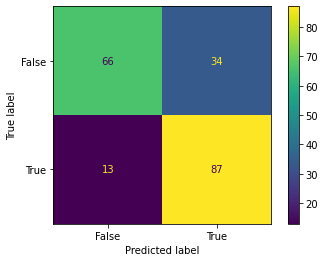

In [87]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test_knn,y_pred_knn)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

cm_display.plot()
plt.show()

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test_knn,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       100
           1       0.72      0.87      0.79       100

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.76       200
weighted avg       0.78      0.77      0.76       200



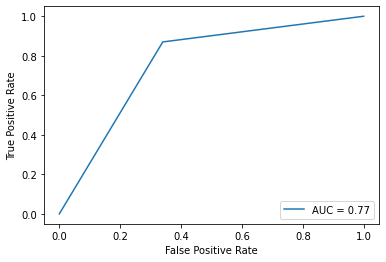

In [94]:
fpr,tpr,thresholds=metrics.roc_curve(y_test_knn,y_pred_knn)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()
plt.show()

#KNN is giving an accuracy of 76.5

# Logistic Regression

In [71]:
#Fitting the logistic Regression model
X_train_LR,X_test_LR,y_train_LR,y_test_LR=train_test_split(loan_dataset_1,y,test_size=0.3,random_state=42)

In [72]:
Log_Reg_Model=LogisticRegression()
Log_Reg_Model.fit(X_train_LR,y_train_LR)

result_LR=Log_Reg_Model.score(X_test_LR,y_test_LR)

print(result_LR)

0.77


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [88]:
y_pred_lr=Log_Reg_Model.predict(X_test_LR)

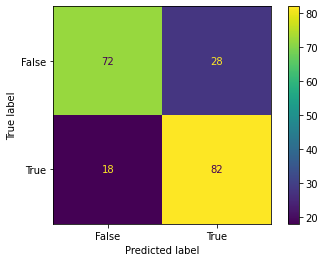

In [89]:
confusion_matrix=metrics.confusion_matrix(y_test_LR,y_pred_lr)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

cm_display.plot()
plt.show()

In [100]:
print(classification_report(y_test_LR,y_pred_lr))
#note that recall score of the minority class is increasing which means we are getting towards a better model

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       100
           1       0.75      0.82      0.78       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



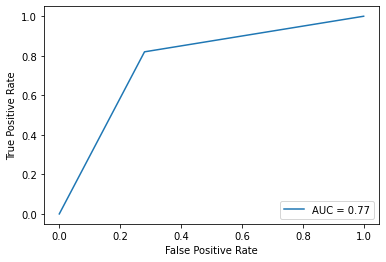

In [95]:
fpr_1,tpr_1,thresholds_1=metrics.roc_curve(y_test_LR,y_pred_lr)
roc_auc_1=metrics.auc(fpr_1,tpr_1)
display=metrics.RocCurveDisplay(fpr=fpr_1,tpr=tpr_1,roc_auc=roc_auc_1)
display.plot()
plt.show()

#Logistic Regression is giving an accuracy of 77%

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [74]:
RF=RandomForestClassifier ()
RF.fit(X_train_knn,y_train_knn)
result_RF=RF.score(X_test_knn,y_test_knn)

print(result_RF)

0.82


In [90]:
y_pred_RF=RF.predict(X_test_knn)

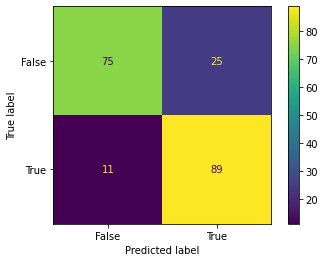

In [91]:
confusion_matrix=metrics.confusion_matrix(y_test_knn,y_pred_RF)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

cm_display.plot()
plt.show()

In [102]:
print(classification_report(y_test_knn,y_pred_RF))
#recall has increased further

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       100
           1       0.78      0.89      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



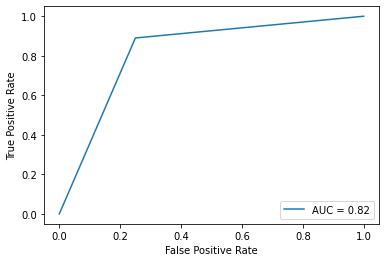

In [96]:
fpr_2,tpr_2,thresholds_2=metrics.roc_curve(y_test_knn,y_pred_RF)
roc_auc_2=metrics.auc(fpr_2,tpr_2)
display=metrics.RocCurveDisplay(fpr=fpr_2,tpr=tpr_2,roc_auc=roc_auc_2)
display.plot()
plt.show()

#Random Forest is giving 82% accuracy


# ADA Boost


In [76]:
ADC=AdaBoostClassifier ()
ADC.fit(X_train_knn,y_train_knn)
result_ADC=ADC.score(X_test_knn,y_test_knn)

print(result_ADC)

0.84


In [92]:
y_pred_ADC=ADC.predict(X_test_knn)

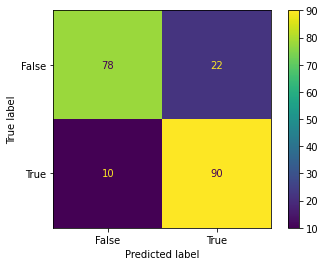

In [93]:
confusion_matrix=metrics.confusion_matrix(y_test_knn,y_pred_ADC)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])

cm_display.plot()
plt.show()

In [103]:
print(classification_report(y_test_knn,y_pred_ADC))
# we have reached a recall of 78% finally

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       100
           1       0.80      0.90      0.85       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



#Top Right Corner is the area of interest since it is showing the number of False Positives. Which is the number of people who should not be granted loan being predicted as people who can be granted loan.

# the amount of true positives is the least in the Ada Boosted Model since it is a sequential model and updated the misclassifications made in the previous decision stumps.

# the model can be further enchanced using Hyper Parameter Tuning to reduce the False Positives further.

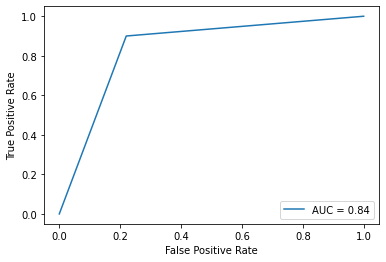

In [97]:
fpr_3,tpr_3,thresholds_3=metrics.roc_curve(y_test_knn,y_pred_ADC)
roc_auc_3=metrics.auc(fpr_3,tpr_3)
display=metrics.RocCurveDisplay(fpr=fpr_3,tpr=tpr_3,roc_auc=roc_auc_3)
display.plot()
plt.show()

#Ada Boost is giving 84% accuracy